In [1]:
from random import choices
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [2]:
def gen(low, high, shape):
    data = np.zeros(shape=shape)
    span = high - low
    for i in range(shape[0]):
        flag = np.random.randint(0, 2)
        low_inc = np.random.randint(0, int(span/2), 1)
        high_dec = np.random.randint(0, int(span/2), 1)
        new_low = low + low_inc
        new_high = high - high_dec
        population = np.linspace(new_low, new_high, 1000)
        weights = np.random.uniform(0, 1, 1000)
        weights[i::2] = weights[i::2] * 10
        weights[i::3] = weights[i::3] * 100
        weights /= weights.sum()
        value = choices(population, weights, k=1)[0]
        data[i] = value
        
    return data

In [3]:
classes = ["Lachs", "Forelle"]
features = ["Gewicht", "Länge"]

n = 1000
split = int(n/2)
n_features = len(features)
n_classes = len(classes)

X_Lachs_Gewicht = gen(15, 35, (split, 1))
X_Lachs_Länge = gen(75, 150, (split, 1))
X_Lachs = np.concatenate((X_Lachs_Gewicht, X_Lachs_Länge), axis=1)
X_Forelle_Gewicht = gen(10, 45, (split, 1))
X_Forelle_Länge = gen(40, 140, (split, 1))
X_Forelle = np.concatenate((X_Forelle_Gewicht, X_Forelle_Länge), axis=1)
X = np.concatenate((X_Lachs, X_Forelle), axis=0)

Y_Lachs = np.zeros(shape=(split, 1), dtype=np.uint8)
Y_Forelle = np.ones(shape=(split, 1), dtype=np.uint8)
Y = np.concatenate((Y_Lachs, Y_Forelle), axis=0)

In [4]:
print(X_Lachs_Gewicht.shape, X_Lachs_Länge.shape, X_Lachs.shape)
print(X_Forelle_Gewicht.shape, X_Forelle_Länge.shape, X_Forelle.shape)
print(X.shape, Y.shape)

(500, 1) (500, 1) (500, 2)
(500, 1) (500, 1) (500, 2)
(1000, 2) (1000, 1)


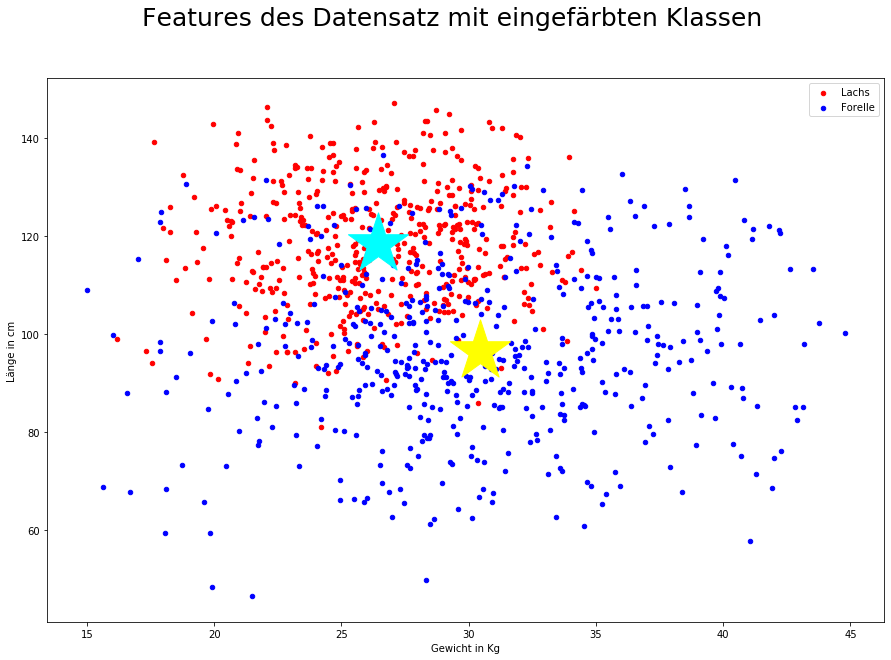

In [5]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(x=X[:split, 0], y=X[:split, 1], color="red", s=20)
plt.scatter(x=X[split:, 0], y=X[split:, 1], color="blue", s=20)
plt.scatter(x=X[split:, 0].mean(), y=X[split:, 1].mean(), color="yellow", marker="*", s=4000)
plt.scatter(x=X[:split, 0].mean(), y=X[:split, 1].mean(), color="cyan", marker="*", s=4000)
plt.legend(["Lachs", "Forelle"], loc='best');
fig.suptitle('Features des Datensatz mit eingefärbten Klassen', fontsize=25)
plt.xlabel("Gewicht in Kg")
plt.ylabel("Länge in cm");

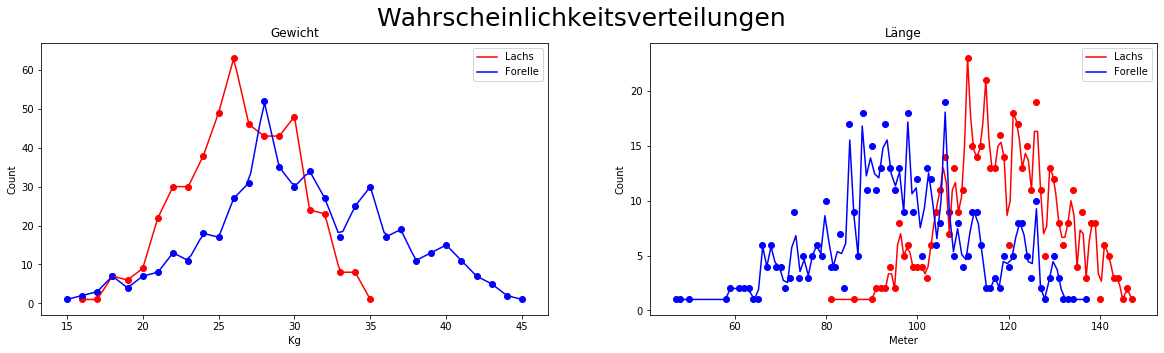

In [6]:
from scipy.interpolate import interp1d

precision = 0
X_round = X.round(decimals=precision)
X_round_Lachs = X_round[:split]
X_round_Forelle = X_round[split:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

unique, counts = np.unique(X_round_Lachs[:, 0], return_counts=True)
f = interp1d(unique, counts)
x_new = np.linspace(X_round_Lachs[:, 0].min(), X_round_Lachs[:, 0].max(), 100)
axes[0].plot(x_new, f(x_new), color="red")
axes[0].scatter(unique, counts, color="red")

unique, counts = np.unique(X_round_Forelle[:, 0], return_counts=True)
f = interp1d(unique, counts)
x_new = np.linspace(X_round_Forelle[:, 0].min(), X_round_Forelle[:, 0].max(), 100)
axes[0].plot(x_new, f(x_new), color="blue")
axes[0].scatter(unique, counts, color="blue");

axes[0].set_title("Gewicht")
axes[0].set_xlabel("Kg")
axes[0].set_ylabel("Count")
axes[0].legend(["Lachs", "Forelle"], loc='best')

unique, counts = np.unique(X_round_Lachs[:, 1], return_counts=True)
f = interp1d(unique, counts)
x_new = np.linspace(X_round_Lachs[:, 1].min(), X_round_Lachs[:, 1].max(), 100)
axes[1].plot(x_new, f(x_new), color="red")
axes[1].scatter(unique, counts, color="red")

unique, counts = np.unique(X_round_Forelle[:, 1], return_counts=True)
f = interp1d(unique, counts)
x_new = np.linspace(X_round_Forelle[:, 1].min(), X_round_Forelle[:, 1].max(), 100)
axes[1].plot(x_new, f(x_new), color="blue")
axes[1].scatter(unique, counts, color="blue")

fig.suptitle('Wahrscheinlichkeitsverteilungen', fontsize=25)
axes[1].set_title("Länge")
axes[1].set_xlabel("Meter")
axes[1].set_ylabel("Count")
axes[1].legend(["Lachs", "Forelle"], loc='best');

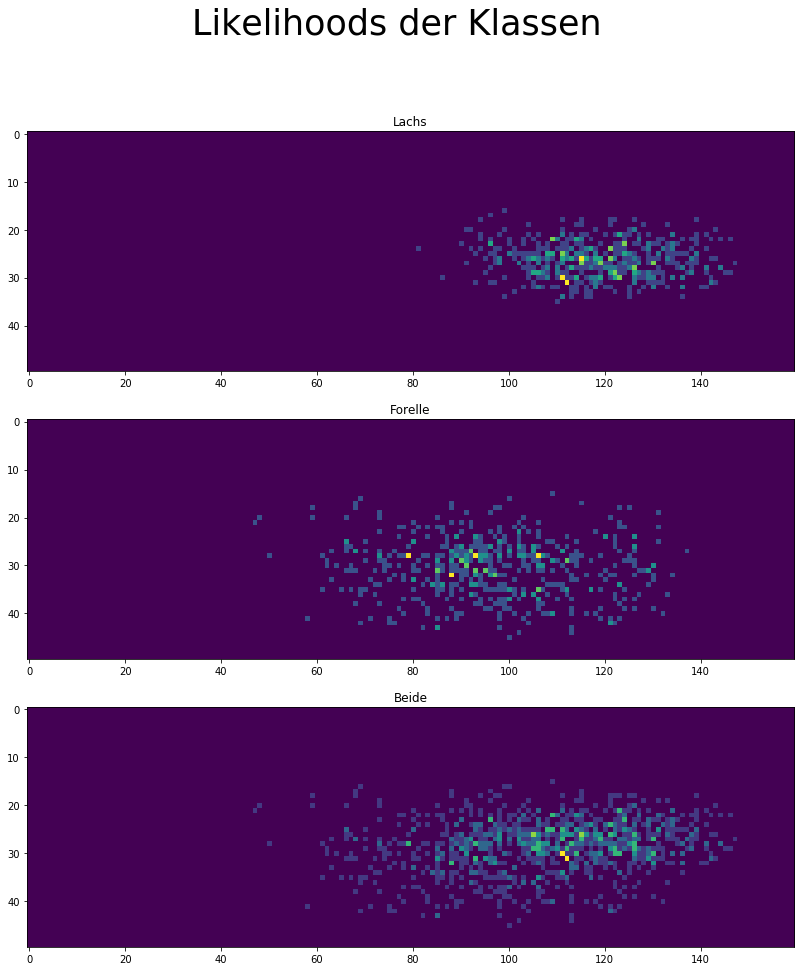

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
likelihood = np.zeros(shape=(50, 160), dtype=np.uint8)

likelihood_Lachs = np.zeros(shape=(50, 160), dtype=np.uint8)
for i in range(0, split):
    value = X_round[i].astype(int)
    x = value[0]
    y = value[1]
    likelihood_Lachs[x, y] += 1
    likelihood[x, y] += 1
likelihood_Lachs = likelihood_Lachs / split    
axes[0].imshow(likelihood_Lachs, cmap="viridis", vmin=0, vmax=likelihood_Lachs.max())
axes[0].set_title(classes[0]);
    
likelihood_Forelle = np.zeros(shape=(50, 160), dtype=np.uint8)
for i in range(split, n):
    value = X_round[i].astype(int)
    x = value[0]
    y = value[1]
    likelihood_Forelle[x, y] += 1
    likelihood[x, y] += 1
likelihood_Forelle = likelihood_Forelle / split
axes[1].imshow(likelihood_Forelle, cmap="viridis", vmin=0, vmax=likelihood_Forelle.max())
axes[1].set_title(classes[1]);

likelihood = likelihood / n
axes[2].imshow(likelihood, cmap="viridis", vmin=0, vmax=likelihood.max())
axes[2].set_title("Beide");

fig.suptitle('Likelihoods der Klassen', fontsize=35, verticalalignment="center", horizontalalignment="center");

In [8]:
apriori_Lachs = 0.5
apriori_Forelle = 0.5

x = [28, 100]

evidenz = likelihood_Lachs[x[0], x[1]] * apriori_Lachs + likelihood_Forelle[x[0], x[1]] * apriori_Forelle
aposteriori_Lachs = (likelihood_Lachs[x[0], x[1]] * apriori_Lachs) / evidenz
aposteriori_Forelle = (likelihood_Forelle[x[0], x[1]] * apriori_Forelle) / evidenz
print("Apriori Lachs: {}".format(apriori_Lachs))
print("Apriori Forelle: {}".format(apriori_Forelle))
print("Aposteriori Lachs: {}".format(aposteriori_Lachs))
print("Aposteriori Forelle: {}".format(aposteriori_Forelle))

Apriori Lachs: 0.5
Apriori Forelle: 0.5
Aposteriori Lachs: 0.0
Aposteriori Forelle: 1.0


In [9]:
n_test = 100
accuracy = 0
for index in np.random.randint(0, n, n_test):
    x1, x2 = X_round[index].astype(int)
    evidenz = likelihood_Lachs[x1, x2] * apriori_Lachs + likelihood_Forelle[x1, x2] * apriori_Forelle
    aposteriori_Lachs = (likelihood_Lachs[x1, x2] * apriori_Lachs) / evidenz
    aposteriori_Forelle = (likelihood_Forelle[x1, x2] * apriori_Forelle) / evidenz
    y_pred = classes[np.argmax([aposteriori_Lachs, aposteriori_Forelle])]
    y = classes[Y[index, 0]]
    accuracy += (y_pred == y)
    
    print("Gewicht: {} Kg, Länge: {} cm".format(x1, x2))
    print("Aposteriori Lachs: {} %".format(np.round(aposteriori_Lachs * 100, decimals=2)))
    print("Aposteriori Forelle: {} %".format(np.round(aposteriori_Forelle * 100, decimals=2)))
    print("Ground truth: {}".format(y))
    print("Accuracy: {} / {} = {} %".format(accuracy, n_test, np.round((accuracy / n_test) * 100), decimals=2))
    print()
print("Total accuracy: {} / {} = {} %".format(accuracy, n_test, np.round((accuracy / n_test) * 100), decimals=2))

Gewicht: 29 Kg, Länge: 126 cm
Aposteriori Lachs: 75.0 %
Aposteriori Forelle: 25.0 %
Ground truth: Forelle
Accuracy: 0 / 100 = 0.0 %

Gewicht: 22 Kg, Länge: 114 cm
Aposteriori Lachs: 100.0 %
Aposteriori Forelle: 0.0 %
Ground truth: Lachs
Accuracy: 1 / 100 = 1.0 %

Gewicht: 26 Kg, Länge: 131 cm
Aposteriori Lachs: 100.0 %
Aposteriori Forelle: 0.0 %
Ground truth: Lachs
Accuracy: 2 / 100 = 2.0 %

Gewicht: 29 Kg, Länge: 110 cm
Aposteriori Lachs: 66.67 %
Aposteriori Forelle: 33.33 %
Ground truth: Lachs
Accuracy: 3 / 100 = 3.0 %

Gewicht: 29 Kg, Länge: 115 cm
Aposteriori Lachs: 100.0 %
Aposteriori Forelle: 0.0 %
Ground truth: Lachs
Accuracy: 4 / 100 = 4.0 %

Gewicht: 26 Kg, Länge: 125 cm
Aposteriori Lachs: 100.0 %
Aposteriori Forelle: 0.0 %
Ground truth: Lachs
Accuracy: 5 / 100 = 5.0 %

Gewicht: 22 Kg, Länge: 136 cm
Aposteriori Lachs: 100.0 %
Aposteriori Forelle: 0.0 %
Ground truth: Lachs
Accuracy: 6 / 100 = 6.0 %

Gewicht: 27 Kg, Länge: 147 cm
Aposteriori Lachs: 100.0 %
Aposteriori Forelle: 0